In [17]:
from variable_dropout.variable_dropout import variable_dropout
from variable_dropout.plot_variable_dropout import plot_variable_dropout
import pandas as pd
from numpy import random
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
from sklearn.linear_model import LogisticRegression
import sklearn as sk

In [10]:
rng = random.RandomState(0)

In [11]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [12]:
dataset = datasets.load_breast_cancer()

X = pd.DataFrame(dataset.data)
Y=dataset['target']

In [34]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
model_rf = RandomForestClassifier()
model_rf.fit(X = X, y=Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
importance_rf = variable_dropout(model_rf, X, Y, loss_function=sk.metrics.hinge_loss, random_state=rng)

In [26]:
pd.DataFrame(importance_rf)

,variable,dropout_loss,label
0,_baseline_,0.83572,RandomForestClassifier
1,22,0.44823,RandomForestClassifier
2,21,0.38321,RandomForestClassifier
3,7,0.37766,RandomForestClassifier
4,0,0.37414,RandomForestClassifier
5,20,0.37406,RandomForestClassifier
6,29,0.37329,RandomForestClassifier
7,4,0.37533,RandomForestClassifier
8,12,0.37636,RandomForestClassifier
9,13,0.37367,RandomForestClassifier


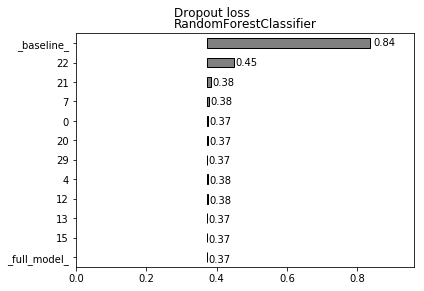

In [27]:
plot_variable_dropout(importance_rf)

In [35]:
#another model
model_lr = LogisticRegression()

model_lr.fit(X,y=Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
importance_lr = variable_dropout(model_lr, X, Y, loss_function=sk.metrics.hinge_loss, random_state=rng)

In [37]:
pd.DataFrame(importance_lr)

,variable,dropout_loss,label
0,_baseline_,0.83648,LogisticRegression
1,23,0.88603,LogisticRegression
2,22,0.60615,LogisticRegression
3,0,0.51297,LogisticRegression
4,13,0.50551,LogisticRegression
5,20,0.47959,LogisticRegression
6,21,0.47853,LogisticRegression
7,2,0.43889,LogisticRegression
8,3,0.43394,LogisticRegression
9,26,0.41918,LogisticRegression


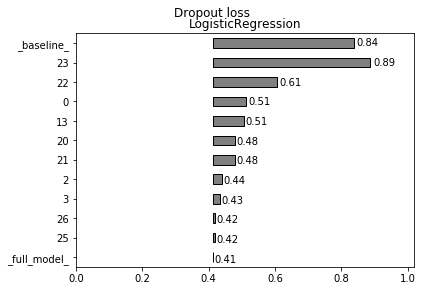

In [38]:
plot_variable_dropout(importance_lr)

In [39]:
from xgboost import XGBClassifier

In [40]:
model_xgb = XGBClassifier()
model_xgb.fit(X=X, y=Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
importance_xgb = variable_dropout(model_xgb, X, Y, loss_function=sk.metrics.hinge_loss, random_state=rng)

In [42]:
pd.DataFrame(importance_xgb)

,variable,dropout_loss,label
0,_baseline_,0.84438,XGBClassifier
1,27,0.39108,XGBClassifier
2,21,0.39137,XGBClassifier
3,26,0.38262,XGBClassifier
4,15,0.37794,XGBClassifier
5,23,0.38361,XGBClassifier
6,1,0.38048,XGBClassifier
7,13,0.37791,XGBClassifier
8,10,0.37540,XGBClassifier
9,7,0.37899,XGBClassifier


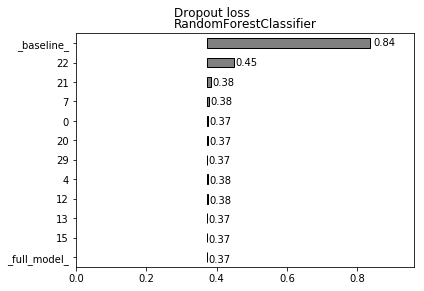

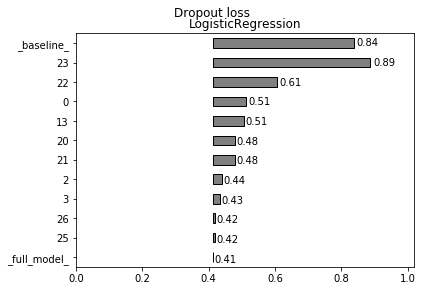

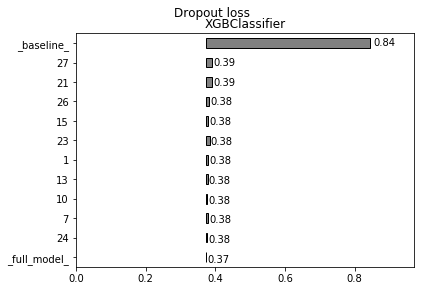

In [48]:
#model comparison
plot_variable_dropout(importance_rf)
plot_variable_dropout(importance_lr)
plot_variable_dropout(importance_xgb)